# Medical Cost personal Insurance project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
medical_Insurance = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
medical_Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# top 5 rows of the dataset
medical_Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_Insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis (EDA)

In [5]:
#Checking the dimention of dataset
medical_Insurance.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns, out of which 1 is target variable and remainign 6 are independant variables

In [6]:
#Lets check the missing values in the dataset

medical_Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#lets check the null value
medical_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see there no null values and there are 3 types of data, that is int, float, and sting

<Axes: >

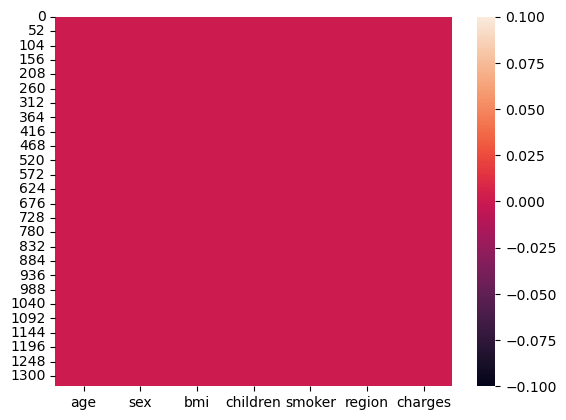

In [9]:
#lets visualize it using heatmap

sns.heatmap(medical_Insurance.isnull())

In [10]:
medical_Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


using the describe method i can see the count, mean, standard deviation, minimum, maximum, and inter quantile values of our dataset

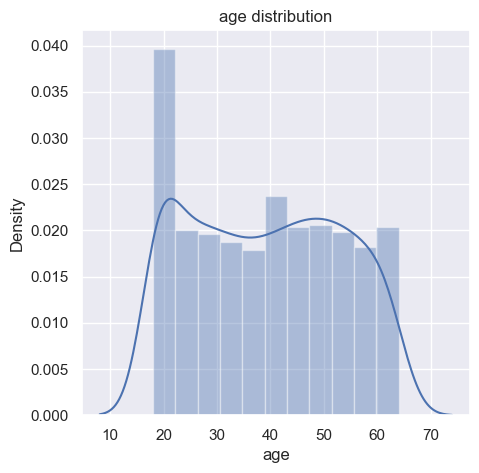

In [13]:
#distribution of age value 

sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medical_Insurance['age']) # distplot tells us the distribution of the dataset throghout
plt.title('age distribution')
plt.show()

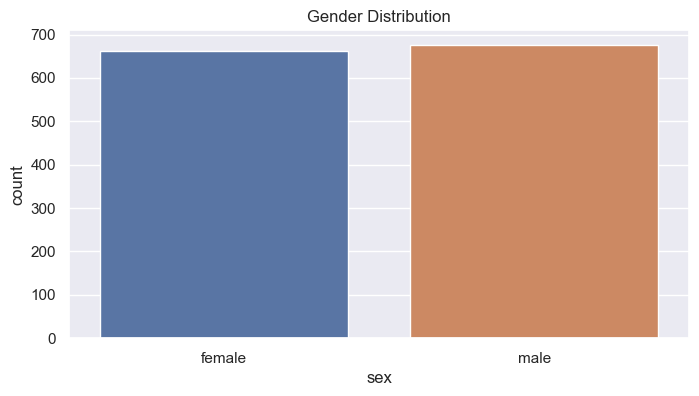

In [16]:
# we cannot use categories on the characters
plt.figure(figsize=(8,4))
sns.countplot(x='sex', data=medical_Insurance)
plt.title('Gender Distribution')
plt.show()

In [17]:
#Value count is helped to ssee how many values are there in the dataset

medical_Insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 500x500 with 0 Axes>

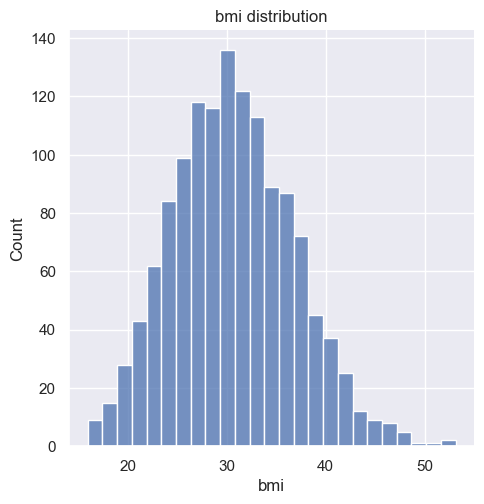

In [18]:
#bmi distribution (body mass index)

plt.figure(figsize=(5,5))
sns.displot(medical_Insurance['bmi']) # displot tell us the distribution of the dataset throught
plt.title('bmi distribution')
plt.show()

normal BMI Range 18.5 to 24.9

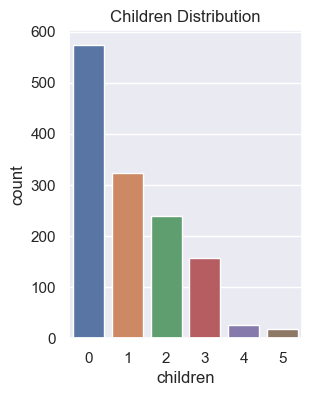

In [21]:
#we can use countplot for children column

plt.figure(figsize=(3,4))
sns.countplot(x='children', data= medical_Insurance)
plt.title('Children Distribution')
plt.show()

In [22]:
#checking the number of chidren with the help of the value counts for the accurate numbers

medical_Insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
#lets check the number smoker and non smokers
medical_Insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

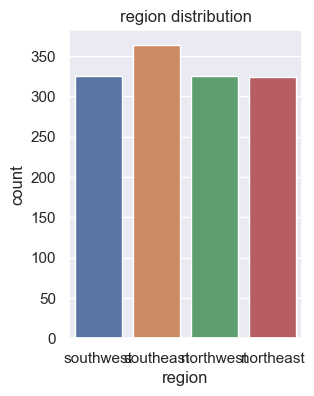

In [28]:
# we can use countplot  for children column

plt.figure(figsize=(3,4))
sns.countplot(x='region', data=medical_Insurance)
plt.title('region distribution')
plt.show()

In [30]:
medical_Insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

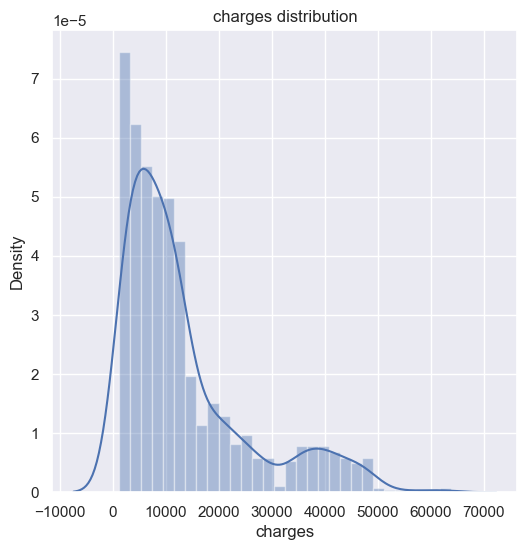

In [31]:
#bmi distribution (body mass index)

plt.figure(figsize=(6,6))
sns.distplot(medical_Insurance['charges']) #distplot tells us the distribution of the dataset throught
plt.title('charges distribution')
plt.show()

# Data pre processing

Encoding the categorical features

In [37]:
# Encoding sex column
medical_Insurance.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#Encoding smoker column
medical_Insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#Encoding region column
medical_Insurance.replace({'region':{'southeast':0,'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [38]:
medical_Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


splitting the features ans the target

In [39]:
x=medical_Insurance.drop(columns='charges', axis=1) # we are dropping the charges column and swaving in x 
y=medical_Insurance['charges']  # we are saving the charges column in y 

In [40]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Spliting the data  into the train and test

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [44]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


training the model

In [45]:
#Loading the linear regression model
regression=LinearRegression()
regression

LinearRegression()

In [46]:
regression.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [47]:
#prediction on training the data

In [48]:
train_pred=regression.predict(x_train)

In [50]:
#R Squared value (it lies in the range of 0 to 1)
r2_train=metrics.r2_score(y_train, train_pred)
print('R Squared value :', r2_train)

R Squared value : 0.751750322722582


In [51]:
test_pred=regression.predict(x_test)
r2_test=metrics.r2_score(y_test, test_pred)
print('R Squared value :', r2_test)

R Squared value : 0.7453661562963468


# Building the preductive system

In [53]:
input_data=(31,1,25.74,0,1,0)
# Changing the input data into the numpy array
num_array=np.asarray(input_data)

#reshaping the array
reshaped_num_array=num_array.reshape(1,-1)

prediction=regression.predict(reshaped_num_array)
print(prediction)
print('The Insurance Cost is USD', prediction[0])

[3652.45982961]
The Insurance Cost is USD 3652.4598296093645
